In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_34752_R')

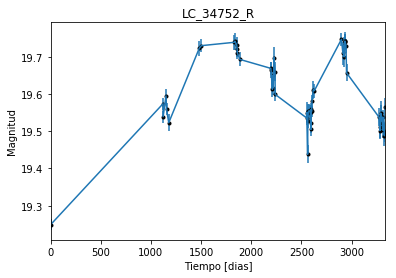

In [2]:
data = np.genfromtxt('LC_34752_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_34752_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

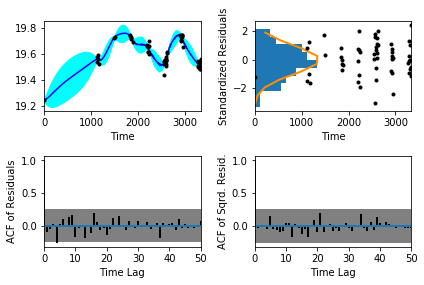

In [5]:
sample.assess_fit()

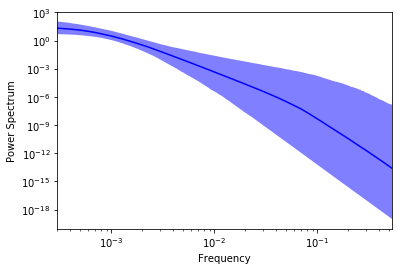

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_34752_R')

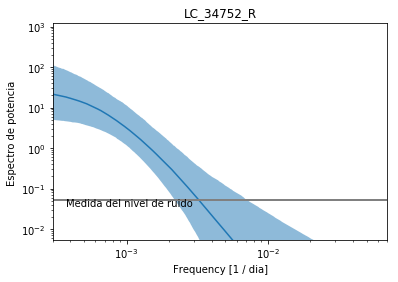

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_34752_R')

Text(0.5,1,'Prediccion , valor esperado LC_34752_R')

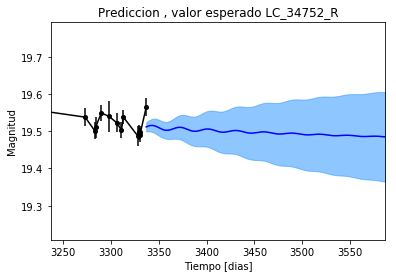

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_34752_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_34752_R')

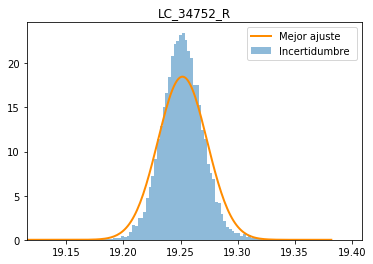

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_34752_R')

Text(0.5,1,'Interpolacion, camino simulado LC_34752_R')

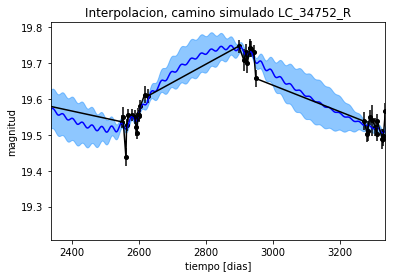

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34752_R')

Text(0.5,1,'Interpolacion, camino simulado LC_34752_R')

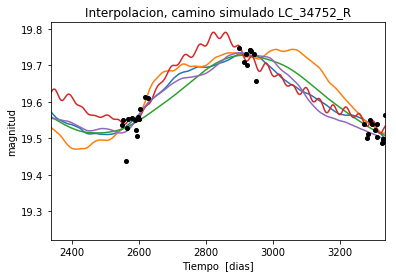

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34752_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1483.80743851
Median: 0.0098637086382
Standard deviation: 0.190819716241
68% credibility interval: [ 0.0007485   0.17461399]
95% credibility interval: [  3.42495787e-04   7.48100782e-01]
99% credibility interval: [  3.06054499e-04   1.00760367e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 631.471201691
Median: 0.000950458396847
Standard deviation: 0.0650245962138
68% credibility interval: [ 0.00039339  0.01434724]
95% credibility interval: [ 0.00031384  0.18106896]
99% credibility interval: [  3.02454960e-04   4.87320191e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1146.88686423
Median: 0.00950931774998
Standar

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1524.39726294
Median: 131.965800462
Standard deviation: 1.54606614462
68% credibility interval: [ 130.21279181  133.02909665]
95% credibility interval: [ 127.77119052  133.57819447]
99% credibility interval: [ 125.7449647  133.799981 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1281.33852814
Median: 0.561009008689
Standard deviation: 2.17145205577
68% credibility interval: [ 0.04468037  3.69039027]
95% credibility interval: [ 0.01236199  7.36782285]
99% credibility interval: [  9.17586209e-03   9.61761829e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 543.399605514
Median: 0.185753522661
Standard deviation: 7.96527148771
68% credibility interval: [ 0.00784986  5.08690728]
95% credibility interval: [  5.8

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1592.3446806
Median: 1.74862093902e-28
Standard deviation: 7938.38095081
68% credibility interval: [  9.88504198e-54   5.69758407e-09]
95% credibility interval: [  1.12846615e-84   2.45481493e+00]
99% credibility interval: [  5.36904352e-101   2.35313732e+001]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2783.6539201
Median: 19.5418704463
Standard deviation: 0.116485815303
68% credibility interval: [ 19.44019828  19.62943723]
95% credibility interval: [ 19.27623295  19.74933436]
99% credibility interval: [ 19.12949942  19.87739722]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 696.993674932
Median: 0.00049963931879
Standard deviation: 0.217051214612
68% credibility interval: [ 0.          0.20830342]
95% credibility interval: [ 0.          0.84386037]
99% credibility interval: [ 0.         1.0203042]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 696.993674932
Median: 0.00049963931879
Standard deviation: 0.217051214612
68% credibility interval: [ 0.          0.20830342]
95% credibility interval: [ 0.          0.84386037]
99% credibility interval: [ 0.         1.0203042]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 933.13580854
Median: 0.0
Standard deviation: 0.000252598982377
68% credi

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1524.39726294
Median: 131.965800462
Standard deviation: 1.54606614462
68% credibility interval: [ 130.21279181  133.02909665]
95% credibility interval: [ 127.77119052  133.57819447]
99% credibility interval: [ 125.7449647  133.799981 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1864.50943726
Median: 0.0343768227571
Standard deviation: 0.0478545139615
68% credibility interval: [ 0.0190814   0.07416893]
95% credibility interval: [ 0.01196902  0.17056534]
99% credibility interval: [ 0.00930202  0.28744593]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1263.85679597
Median: 1.33225268822
Standard deviation: 0.209861953639
68% credibility interval: [ 1.13537534  1.54505934]
95% credibility interval: [ 0.95853167  1.78928656]
99% credibility interval: [ 0.8261312   1.92307606]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 990.456429404
Median: 1.98972785687e-05
Standard deviation: 0.0562105457363
68% credibility interval: [  6.49395403e-07   7.99732356e-04]
95% credibility interval: [  3.37397430e-08   5.07010770e-02]
99% credibility interval: [  9.41885445e-09   2.46732223e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1483.80743851
Median: (-0.0619755091898-0.647548088702j)
Standard deviation: 1.81586657631
68% credibility interval: [-1.09713203+0.j         -0.00470297-0.07024104j]
95% credibility interval: [ -4.70045584e+00+0.j          -2.15196450e-03-0.35988893j]
99% credibility interval: [ -6.33096056e+00+0.j          -1.92299713e-03-2.48250722j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 631.471201691
Median: (-0.00597190623415+0.152182640758j)
Standard deviation: 1.42365704203
68% credibility interval: [-0.09014634+0.51912574j -0.00247177+0.00363599j]
95% credibility interval: [-1.13768981+1.68910366j -0.00197192+0.j        ]
99% credibility interval: [ -3.06192306e+00+4.92424163j  -1.90038056e-03+0.j        ]
Posterior s